In [10]:
# Author : Vijayendra
# Email : vijayendra05@gmail.com
# Designation : Artificial Intelligence Engineer
# This is a clustering problem for Retail Data 

# K-Means Clustering

## Import Libraries and Dataset

In [1]:
import pandas as pd
#importing the dataset
dataset = pd.read_csv('Dataset/Cust_Spend_Data.csv')
#creating a duplicate dataset to work on
dataset1 = dataset
# peeking at the dataset
dataset1.head()

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4
3,4,D,6500,5,1,1,4
4,5,E,6000,6,0,12,3


In [2]:
#Descriptive stats of the variables in data
dataset1.describe()

,Cust_ID,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
count,10.00000,10.000000,10.000000,10.000000,10.0000,10.00000
mean,5.50000,4850.000000,4.000000,0.300000,4.3000,4.00000
std,3.02765,2877.595447,1.699673,0.483046,4.6916,3.05505
min,1.00000,1000.000000,2.000000,0.000000,1.0000,0.00000
25%,3.25000,2500.000000,3.000000,0.000000,1.0000,2.00000
50%,5.50000,5000.000000,3.500000,0.000000,1.5000,3.50000
75%,7.75000,6875.000000,5.000000,0.750000,8.2500,6.25000
max,10.00000,10000.000000,7.000000,1.000000,12.0000,9.00000


## Feature Scaling

In [3]:
data = dataset1.iloc[:, 2:6].values  #standardize the data to normal distribution
from sklearn import preprocessing
dataset1_standardized = preprocessing.scale(data)
dataset1_standardized = pd.DataFrame(dataset1_standardized)
print (dataset1_standardized)

          0         1         2         3
0  1.886498 -1.240347  1.527525 -0.741433
1  0.787567 -0.620174 -0.654654  1.280656
2  0.787567  1.860521  1.527525 -0.292080
3  0.604412  0.620174  1.527525 -0.741433
4  0.421257  1.240347 -0.654654  1.730009
5 -0.311364 -0.620174 -0.654654 -0.741433
6 -0.860829  0.620174 -0.654654  1.505333
7 -0.860829 -0.620174 -0.654654 -0.741433
8 -1.043984 -1.240347 -0.654654 -0.516756
9 -1.410294  0.000000 -0.654654 -0.741433


## WSS Plot or Elbow Curve for Optimal cluster identification

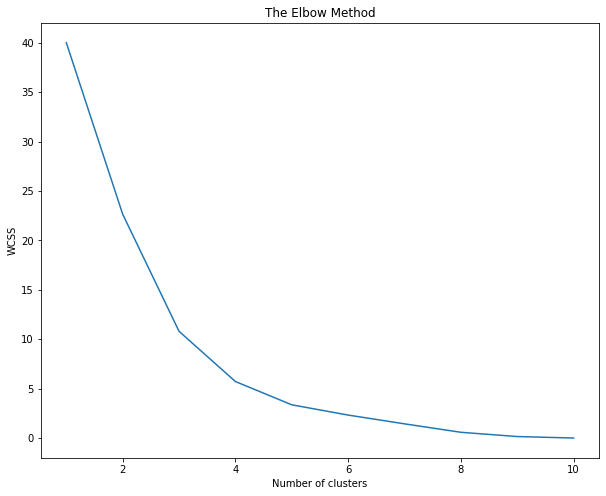

In [4]:
import matplotlib.pyplot as plt  
import pandas as pd  
%matplotlib inline
import numpy as np
#find the appropriate cluster number
plt.figure(figsize=(10, 8))
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dataset1_standardized)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## K-Means Clustering & Cluster Information

In [5]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(dataset1_standardized)
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1
# New Dataframe called cluster
cluster = pd.DataFrame(y_kmeans1)
# Adding cluster to the Dataset1
dataset1['cluster'] = cluster
#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(dataset1.groupby('cluster').mean(),1))
kmeans_mean_cluster

,Cust_ID,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
cluster,,,,,,
1,4.7,5166.7,4.7,0.0,11.0,4.7
2,8.2,2375.0,3.0,0.0,1.2,4.5
3,2.7,7833.3,4.7,1.0,1.7,2.7


In [6]:
dataset1

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,cluster
0,1,A,10000,2,1,1,0,3
1,2,B,7000,3,0,10,9,1
2,3,C,7000,7,1,3,4,3
3,4,D,6500,5,1,1,4,3
4,5,E,6000,6,0,12,3,1
5,6,F,4000,3,0,1,8,2
6,7,G,2500,5,0,11,2,1
7,8,H,2500,3,0,1,1,2
8,9,I,2000,2,0,2,2,2
9,10,J,1000,4,0,1,7,2
